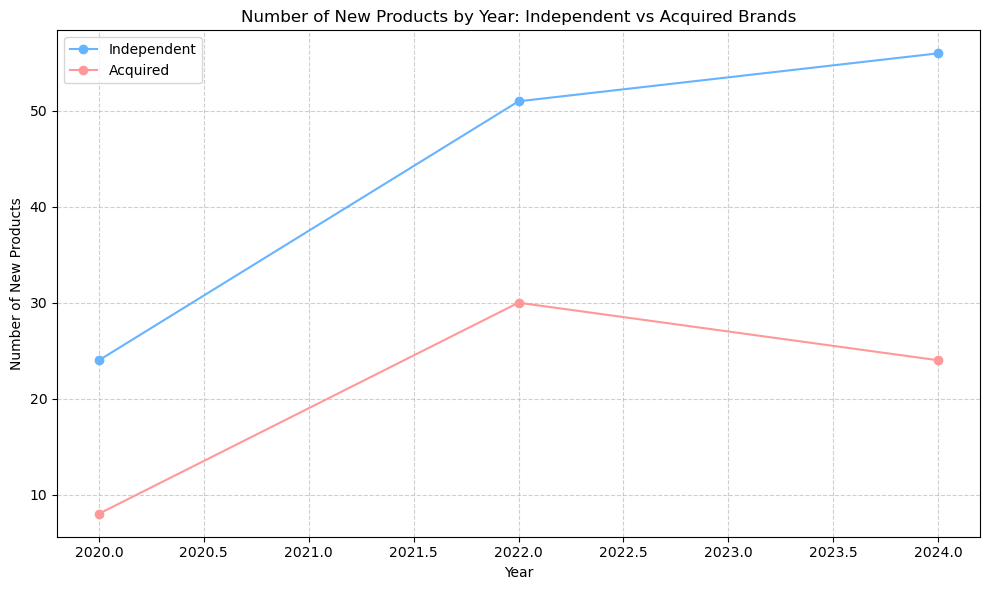

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_excel("Celebrity Independent and Acquired Beauty Brands Dataset.xlsx")


df['Product Launch Year'] = pd.to_numeric(df['Product Launch Year'], errors='coerce')
df['Acquired By'] = df['Acquired By'].fillna('Unknown')
df['Status'] = df['Acquired By'].apply(lambda x: 'Independent' if x == 'Independent' else 'Acquired')


years = [2020, 2022, 2024]
filtered_df = df[df['Product Launch Year'].isin(years)]


grouped = filtered_df.groupby(['Product Launch Year', 'Status']).size().unstack(fill_value=0)


plt.figure(figsize=(10, 6))
plt.plot(grouped.index, grouped['Independent'], marker='o', label='Independent', color='#66b3ff')
plt.plot(grouped.index, grouped['Acquired'], marker='o', label='Acquired', color='#ff9999')

plt.title("Number of New Products by Year: Independent vs Acquired Brands")
plt.xlabel("Year")
plt.ylabel("Number of New Products")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


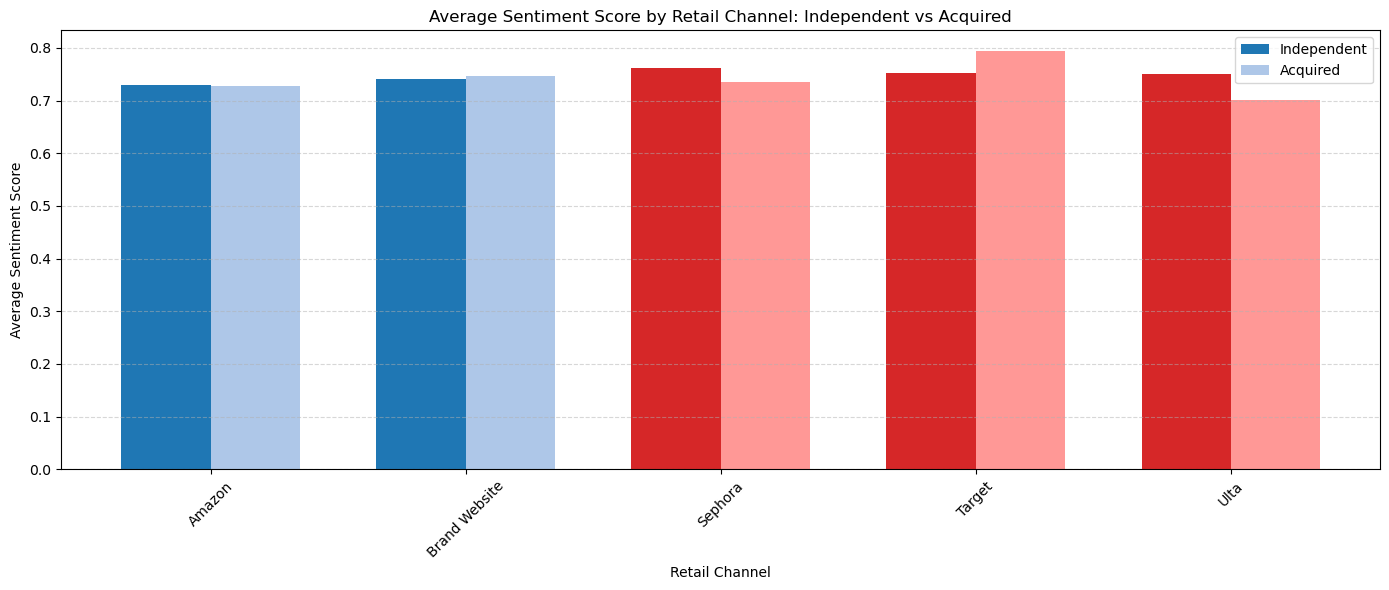

In [2]:
df['Sentiment Score'] = pd.to_numeric(df['Sentiment Score'], errors='coerce')
df['Retail Presence'] = df['Retail Presence'].fillna('Unknown').str.strip()
df['Acquired By'] = df['Acquired By'].fillna('Independent')


df['Type'] = df['Acquired By'].apply(lambda x: 'Acquired' if x.lower() != 'independent' else 'Independent')


df = df[df['Retail Presence'].str.lower() != 'multiple']


grouped = df.groupby(['Retail Presence', 'Type'])['Sentiment Score'].mean().reset_index()


pivot = grouped.pivot(index='Retail Presence', columns='Type', values='Sentiment Score').fillna(0)


pivot = pivot.sort_index()


def get_colors(retail):
    retail = retail.lower()
    if retail in ['amazon', 'brand website']:
        return ['#1f77b4', '#aec7e8'] 
    else:
        return ['#d62728', '#ff9896'] 

colors = [get_colors(r) for r in pivot.index]


x = np.arange(len(pivot.index)) 
width = 0.35  

fig, ax = plt.subplots(figsize=(14, 6))

bars1 = ax.bar(x - width/2, pivot['Independent'], width, label='Independent',
               color=[c[0] for c in colors])
bars2 = ax.bar(x + width/2, pivot['Acquired'], width, label='Acquired',
               color=[c[1] for c in colors])


ax.set_xlabel('Retail Channel')
ax.set_ylabel('Average Sentiment Score')
ax.set_title('Average Sentiment Score by Retail Channel: Independent vs Acquired')
ax.set_xticks(x)
ax.set_xticklabels(pivot.index, rotation=45)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


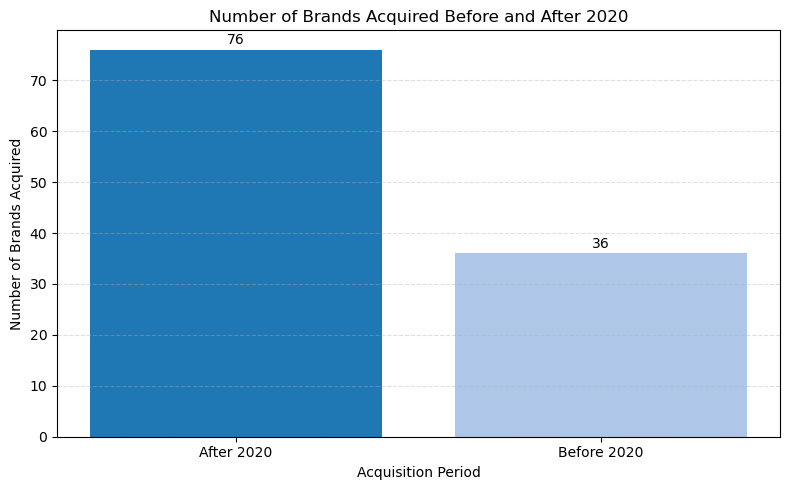

In [3]:
df['Acquisition Year'] = pd.to_numeric(df['Acquisition Year'].replace("Not Applicable", pd.NA), errors='coerce')


df['Acquisition Period'] = df['Acquisition Year'].apply(
    lambda x: 'Before 2020' if pd.notna(x) and x < 2020 else ('After 2020' if pd.notna(x) else 'Not Acquired')
)


acquisition_counts = df[df['Acquisition Period'] != 'Not Acquired']['Acquisition Period'].value_counts().sort_index()


plt.figure(figsize=(8, 5))
bars = plt.bar(acquisition_counts.index, acquisition_counts.values, color=['#1f77b4', '#aec7e8'])


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, int(height), ha='center', va='bottom')


plt.title("Number of Brands Acquired Before and After 2020")
plt.xlabel("Acquisition Period")
plt.ylabel("Number of Brands Acquired")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()
